<a href="https://colab.research.google.com/github/Mohammed-Fayaz-Ahamed/DataScience_assignment/blob/main/Forecasting_Airlines%2BData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airlines+Data
Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for
Forecasting.


In [2]:
# Import the file
import pandas as pd

air = pd.read_excel("/content/Airlines+Data.xlsx")
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
air.isnull().sum()

Month         0
Passengers    0
dtype: int64

<Axes: >

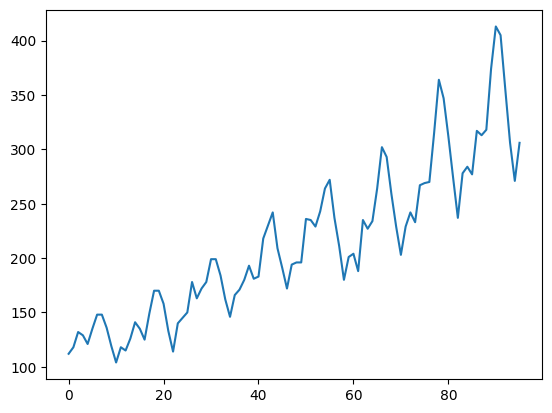

In [4]:
import matplotlib.pyplot as plt
air.Passengers.plot()

In [6]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [8]:
air.rename({'Month':'Date'},axis=1, inplace=True)

In [9]:
air

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [11]:
air["Date"] = pd.to_datetime(air.Date,format="%b-%y")
air["month"] = air.Date.dt.strftime("%b") # month extraction
air["year"] = air.Date.dt.strftime("%Y") # year extraction
air

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


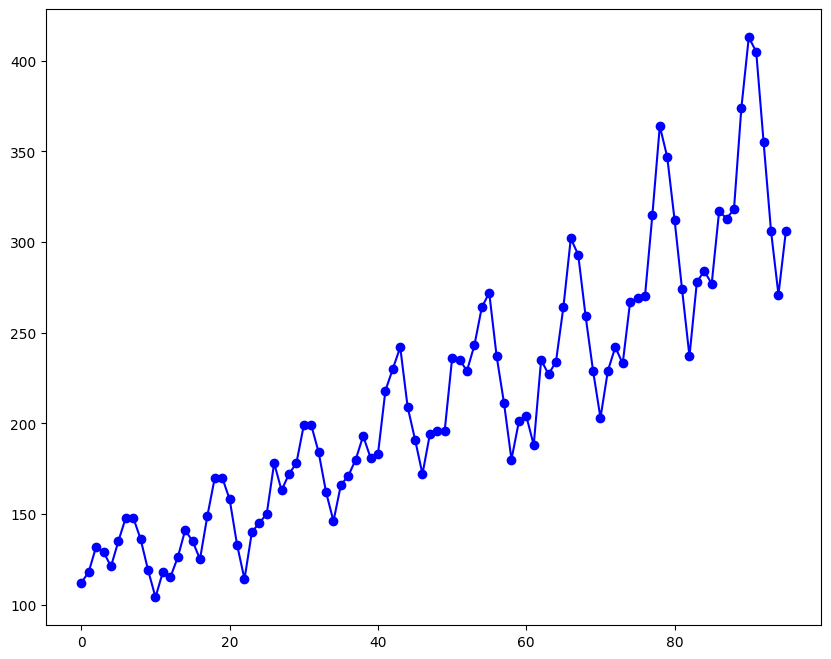

In [15]:
air['Passengers'].plot(figsize=(10, 8),color='blue',marker='o')
plt.show()

<Axes: >

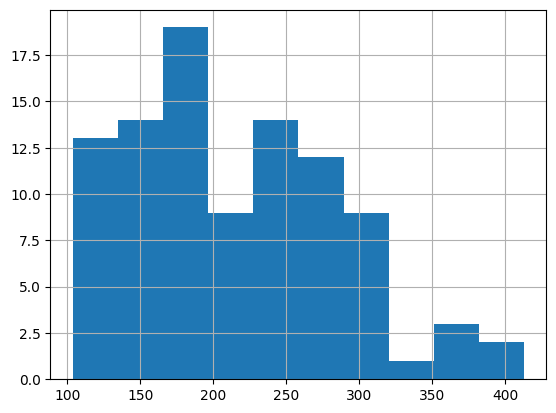

In [16]:
#Histogram
air.Passengers.hist()

<Axes: ylabel='Density'>

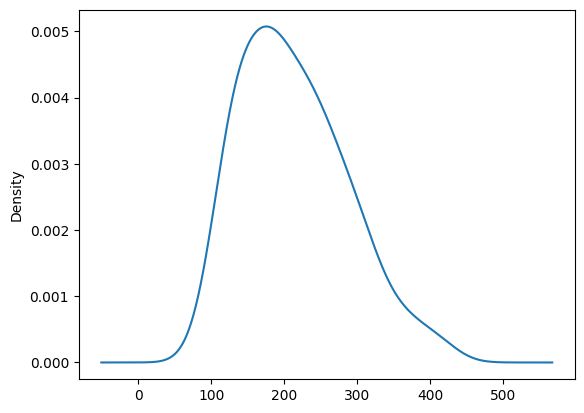

In [17]:
#Density plot and Lag plot
air.Passengers.plot(kind='kde')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

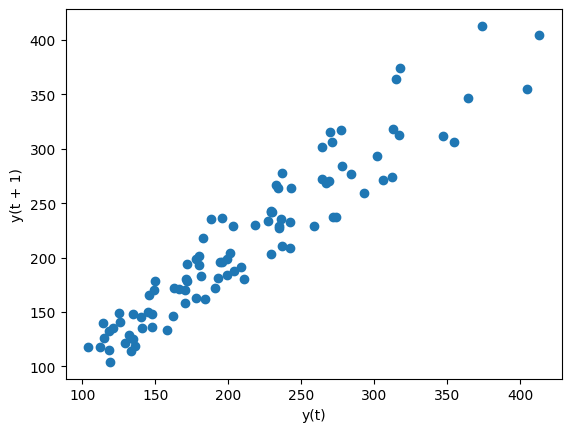

In [21]:
# scatter plot
from pandas.plotting import lag_plot
lag_plot(air.Passengers)

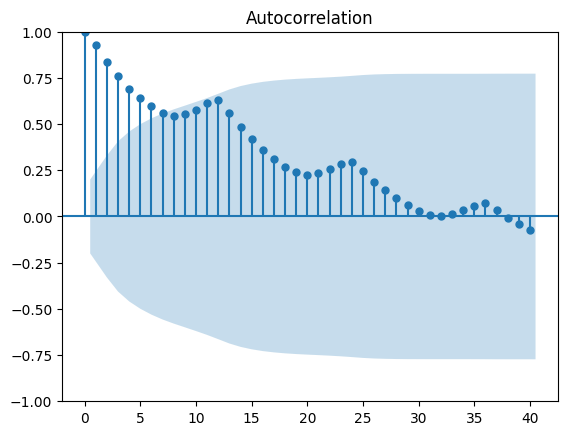

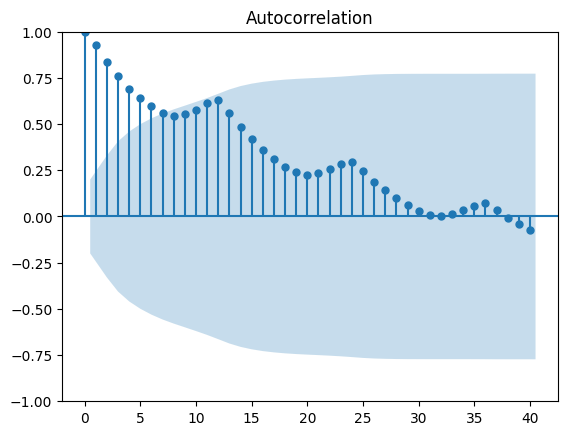

In [18]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(air.Passengers,lags=40)

<Axes: xlabel='year', ylabel='Passengers'>

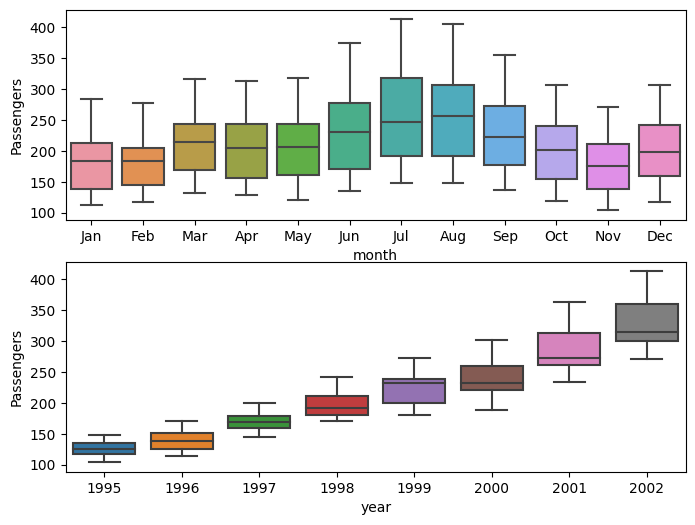

In [23]:
# Box plot for every
import seaborn as sns
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month", y="Passengers" ,data = air)

plt.subplot(212)
sns.boxplot(x="year", y="Passengers" ,data = air)


## Splitting data

In [24]:
Train = air.head(int(len(air.Date)*0.9))
Test = air.tail(len(air.Date)-(len(Train.Date)))
Train

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
81,2001-10-01,274,Oct,2001
82,2001-11-01,237,Nov,2001
83,2001-12-01,278,Dec,2001
84,2002-01-01,284,Jan,2002


In [25]:
Test

,Date,Passengers,month,year
86,2002-03-01,317,Mar,2002
87,2002-04-01,313,Apr,2002
88,2002-05-01,318,May,2002
89,2002-06-01,374,Jun,2002
90,2002-07-01,413,Jul,2002
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002
95,2002-12-01,306,Dec,2002


In [26]:
size = 72
train_data = air[:size]
test_data = air[size:]

In [29]:
import numpy as np

airline = air.copy()
airline.reset_index(inplace=True)
airline['t'] = np.arange(1,len(airline)+1)
airline['t_squared'] = np.square(airline .t)
airline["month"] = airline.Date.dt.strftime("%b") # month extraction
airline["year"] = airline.Date.dt.strftime("%Y") # year extraction
months = pd.get_dummies(airline['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
airline = pd.concat([airline,months],axis=1)
airline['log_passengers'] = np.log(airline['Passengers'])
airline

,index,Date,Passengers,month,year,t,t_squared,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,0,1995-01-01,112,Jan,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1,1995-02-01,118,Feb,1995,2,4,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,2,1995-03-01,132,Mar,1995,3,9,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,3,1995-04-01,129,Apr,1995,4,16,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,4,1995-05-01,121,May,1995,5,25,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,2002-08-01,405,Aug,2002,92,8464,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,92,2002-09-01,355,Sep,2002,93,8649,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,93,2002-10-01,306,Oct,2002,94,8836,0,0,0,0,0,0,0,0,0,1,0,0,5.723585
94,94,2002-11-01,271,Nov,2002,95,9025,0,0,0,0,0,0,0,0,0,0,1,0,5.602119


In [30]:
train_data = airline.iloc[:size]
test_data = airline.iloc[size:]

In [31]:
# Linear model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_linear))**2))
rmse_linear

51.667792995646266

In [34]:
#Exponential

Exp = smf.ols('log_passengers~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.55232894600461

In [35]:
#Quadratic

Quad = smf.ols('Passengers~t+t_squared',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

51.99073640155397

In [36]:
#Additive seasonality

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

127.2645156532034

In [37]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

35.241608485927266

In [38]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

132.18762800263443

In [39]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test_data))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.714670246780516

In [40]:
#Compare the results

data = {"Models":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

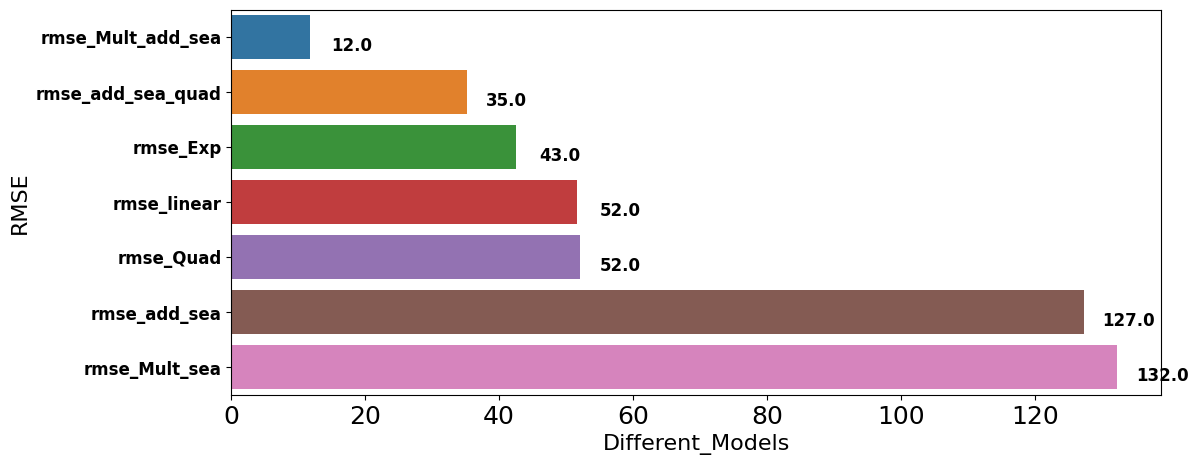

In [41]:
f, axe = plt.subplots(1,1, figsize=(12,5), dpi=100)
sns.barplot(x='RMSE_Values', y='Models', data=table_rmse, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(table_rmse.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()

From the graph we can say that the rmse value is less for the Multiplicative Additive Seasonality